In [6]:
import glob # for file names
import numpy as np
import pandas as pd # to create data frames
from matplotlib import pyplot as plt # visualization 

In [10]:
# This will calculate the percent of the coordinates that are above a standard 
# cutoff (default is 95th percentile). df is created by plot_all_checks
def percent_good(df,cutoff = 0.80):
  lh = df['likelihood']
  return (np.mean(lh > cutoff))

# This is our plot function. Figure contains 4 x 1 subplots
def plot_DLC(df,varname, cutoff = .95, fs = 30):
  #index out coordinates and likelihood values
  x = df['x']
  y = df['y']
  lh = df['likelihood']

  #create timestamps to align the coords over time
  ts = np.linspace(0,len(x)/fs,len(x))

  #easy index for all 'good' coordinates
  x_g = x.loc[lh > cutoff]
  y_g = y.loc[lh > cutoff]
  ts_g = ts[lh > cutoff]

  #setup our figure and subplots
  fig, ax = plt.subplots(4,1,figsize=(15.0, 15.0))

  # First plot, shows all tracked coordinates
  ax[0].scatter(x,y, s = 0.05)
  ax[0].set_aspect('equal','box')
  ax[0].set_title(varname)

  # Second plot, these are only coordinates that pass cutoff
  ax[1].scatter(x_g,y_g, s = 0.05)
  ax[1].set_aspect('equal','box')
  ax[1].set_title('99th likelihood')

  # Third plot, shows x coords over time 
  ax[2].plot(ts,x, color = 'r',label = 'bad')
  ax[2].plot(ts_g,x_g,label = 'good')
  ax[2].set_title('All X coords over time')
  ax[2].legend()

  # Fourth plot, shows y coords over time 
  ax[3].plot(ts,y,color = 'r',label = 'bad')
  ax[3].plot(ts_g,y_g,label = 'good')
  ax[3].set_title('All Y coords over time')
  ax[3].legend()

  plt.tight_layout()

  return fig

# This is the main function. It reads in the csv file, computes/saves the percent
# good coords, and saves the figure back into the google drive. 
#
# Currently, the function is configured for 4 tracked body parts (head, neck,
# body, tail). 
 
def plot_all_checks(file_name):
  
    df = pd.read_csv(file_name, header=[1,2])
    header = df.columns.get_level_values(0).drop_duplicates().to_numpy()
    
    vars = header[1:]
    good_prop = []
    
    for var in vars:
        fig = plot_DLC(df[var],var)
        fig.savefig(file_name.replace('.csv','')+'_'+var+'.png')
        # plt.show()
        good_prop.append(percent_good(df[var]))

    summary = pd.DataFrame(columns=['proportion_good','body_part'])
    summary['proportion_good'] = good_prop
    summary['body_part'] = vars

    return summary





,proportion_good,body_part
0,0.453716,left_cap
1,0.460261,right_cap
2,0.600614,neck
3,0.635182,back
4,0.721719,tail


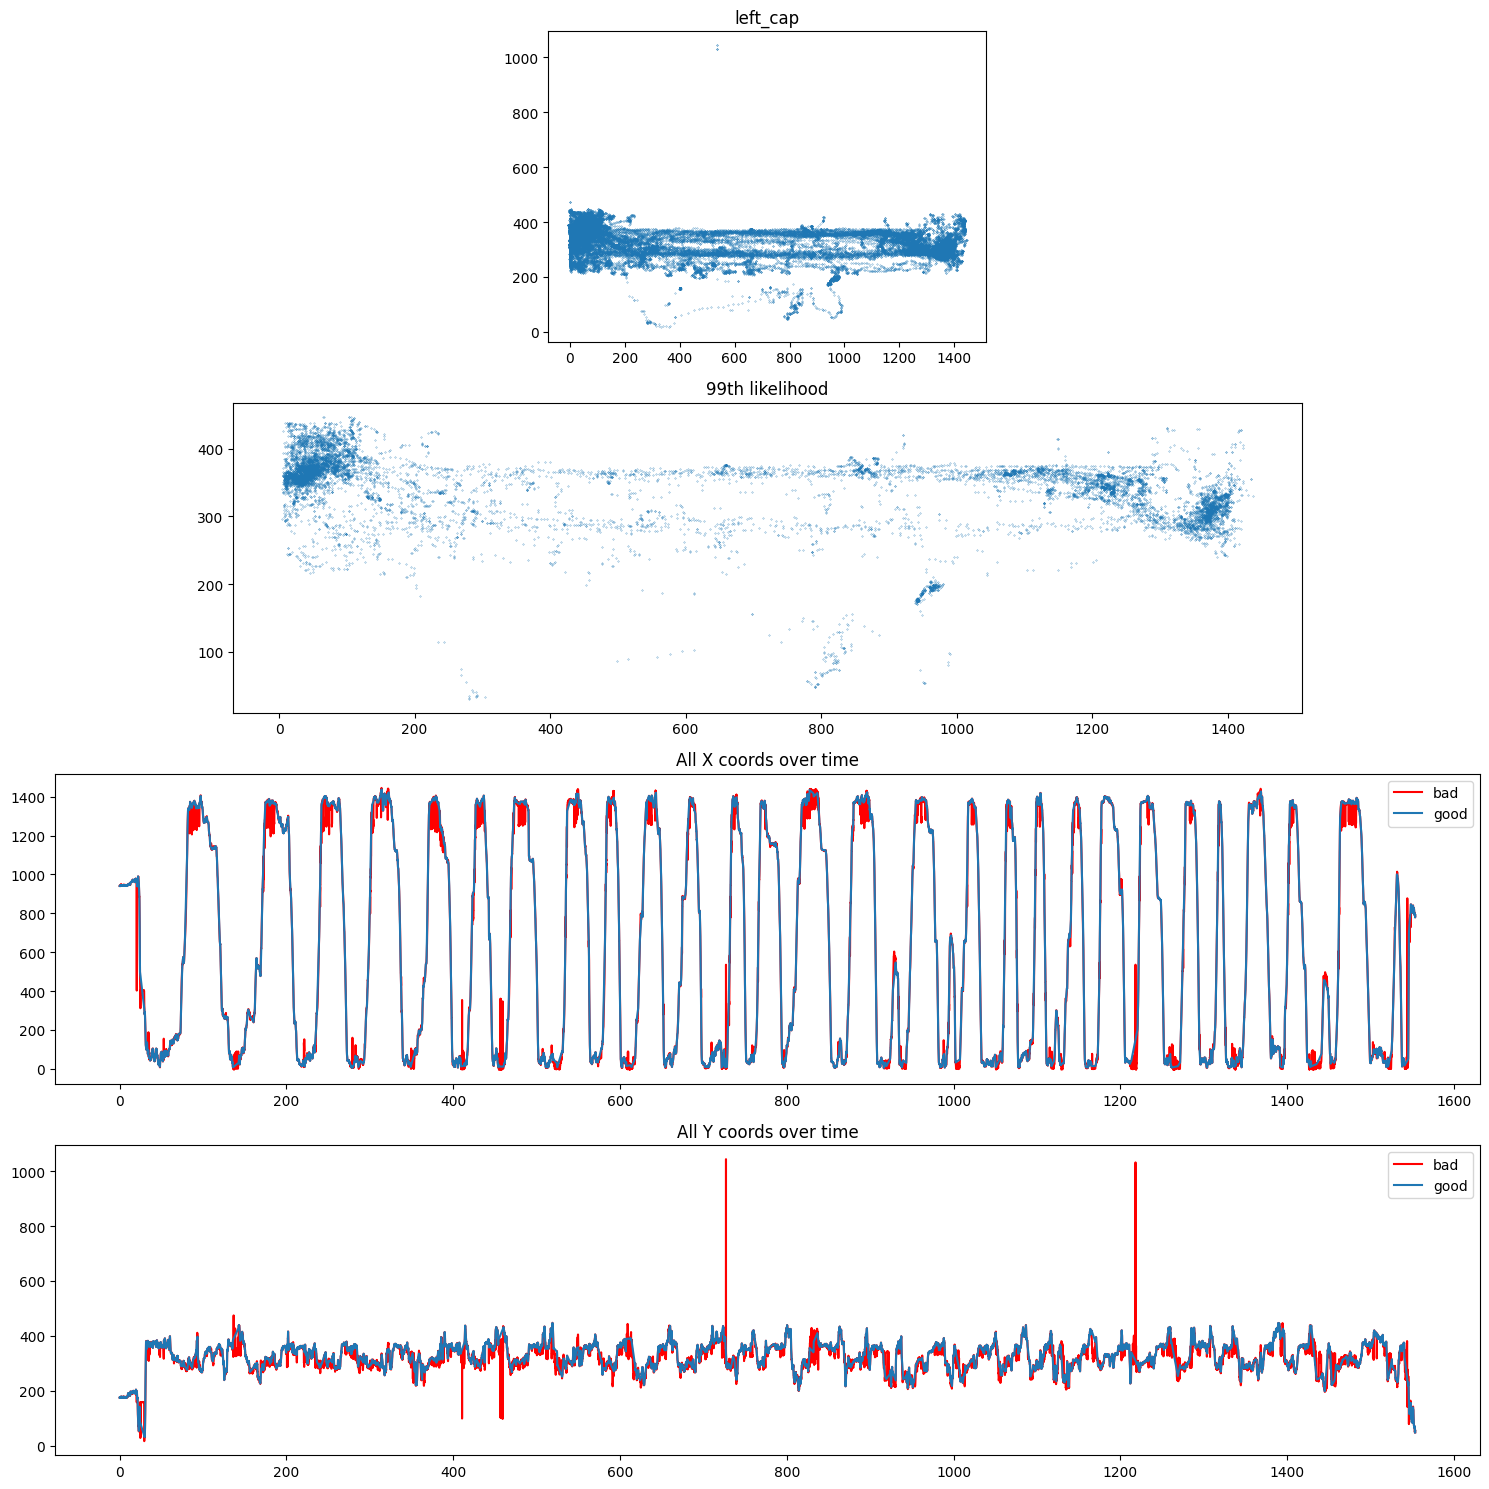

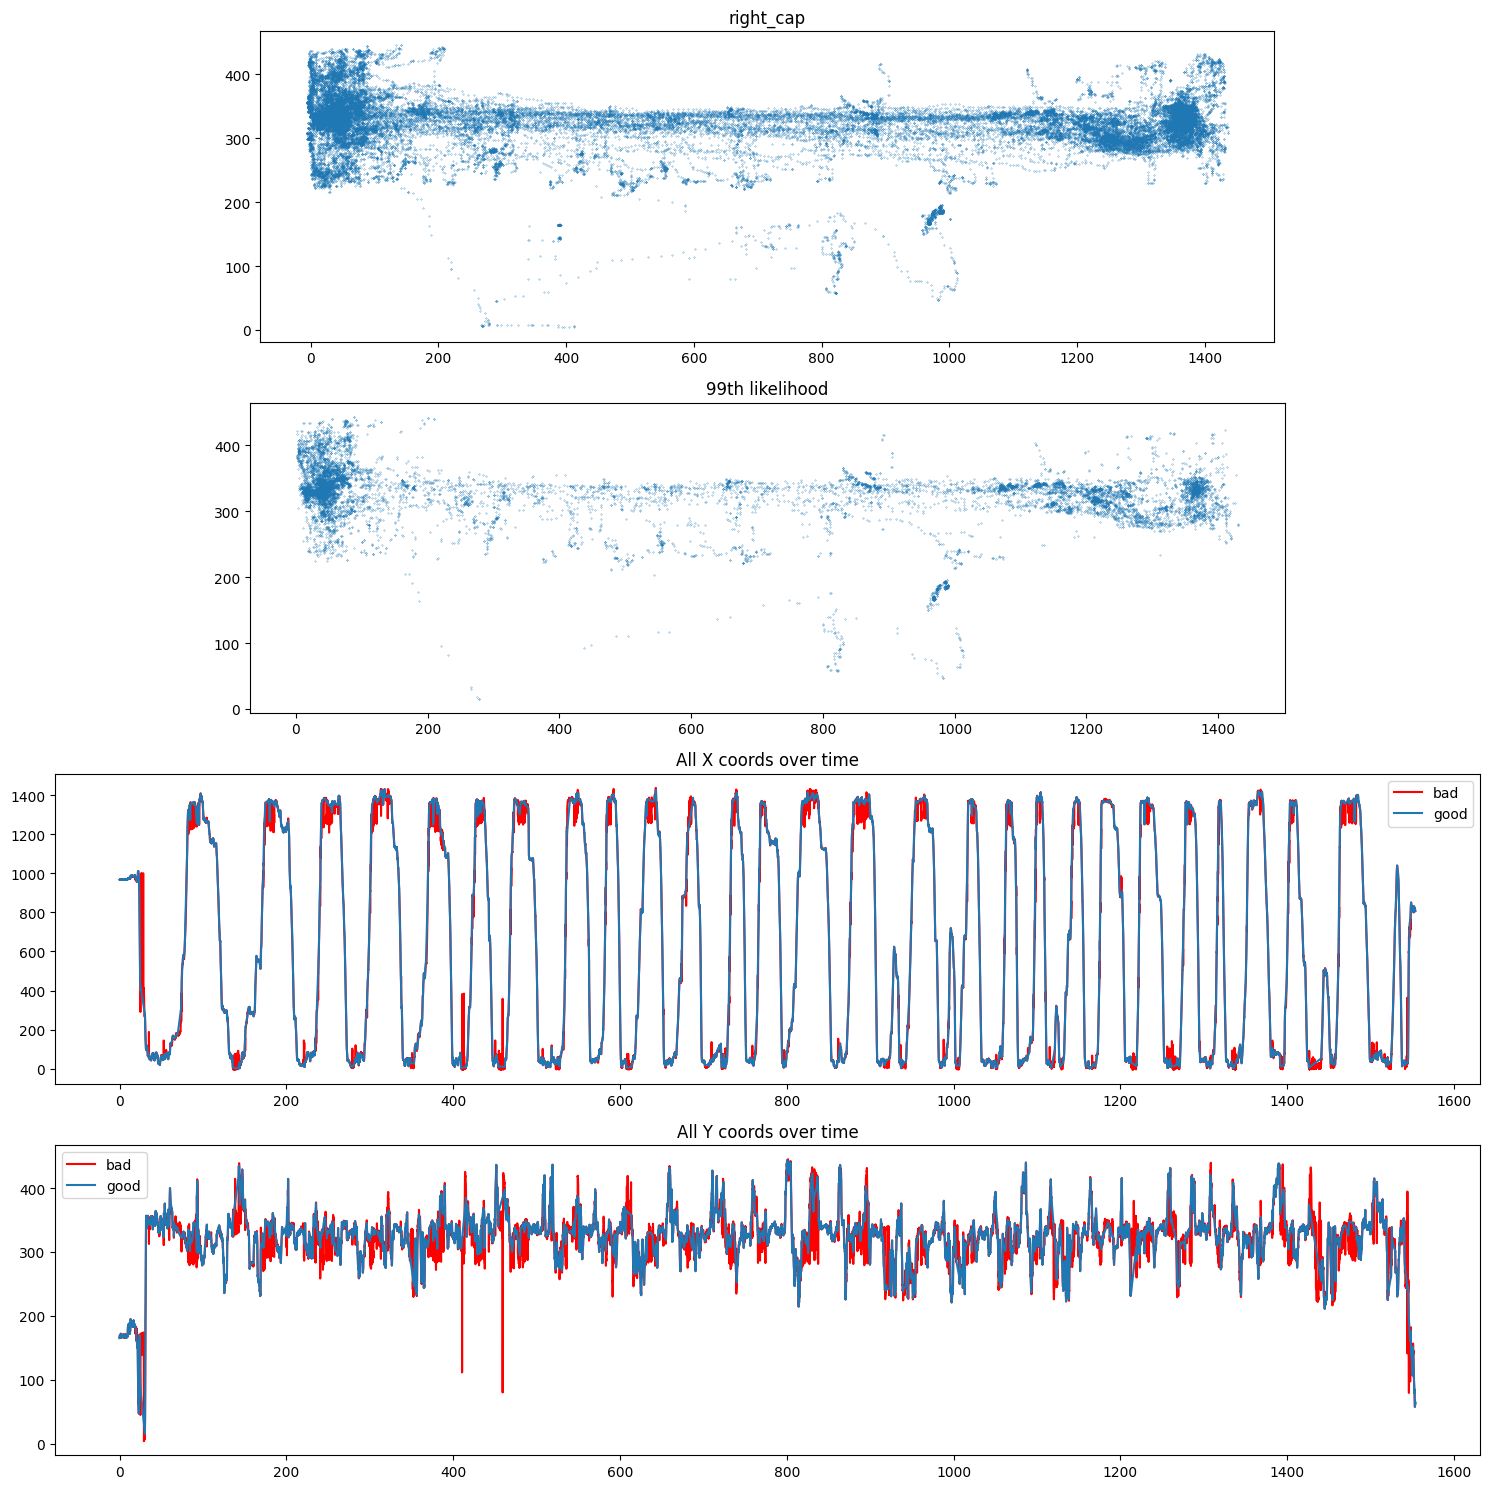

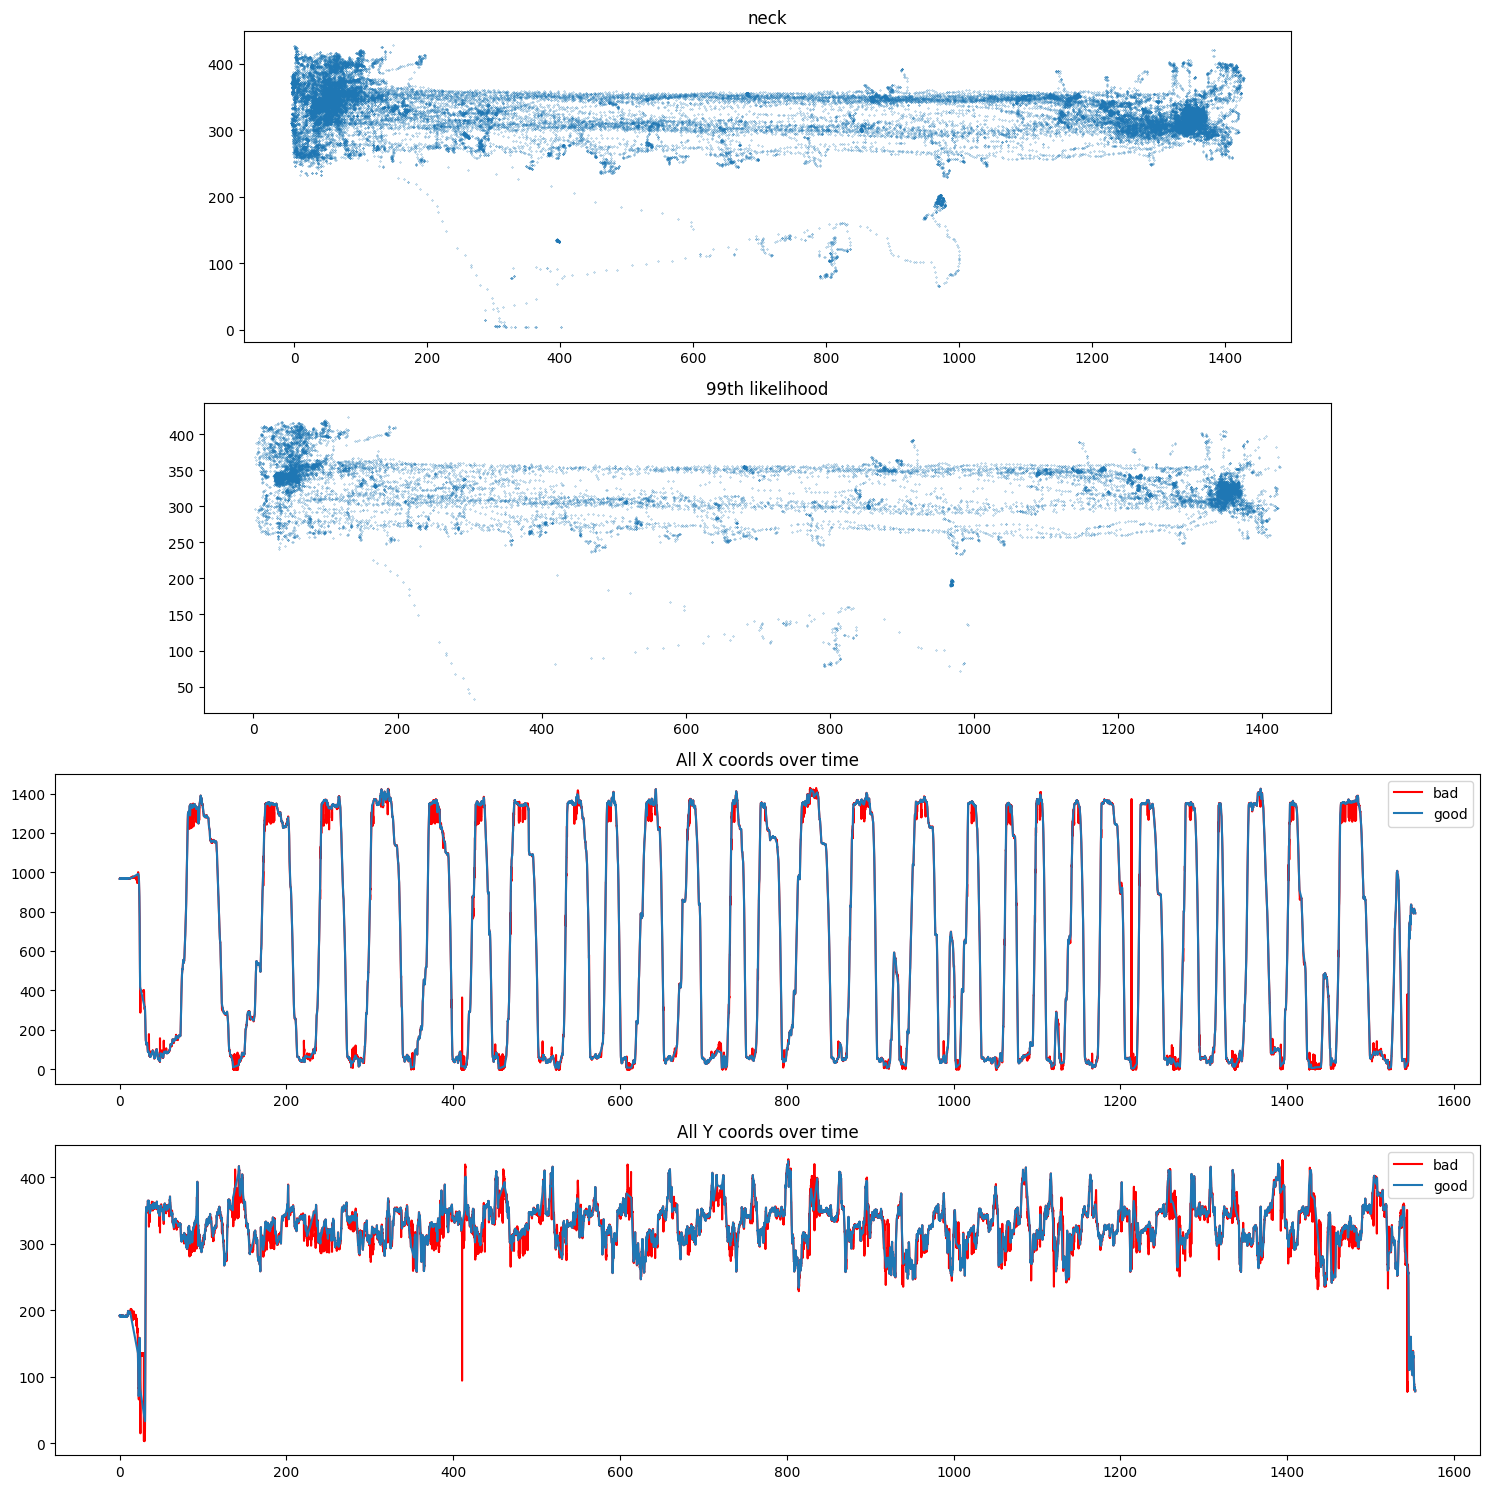

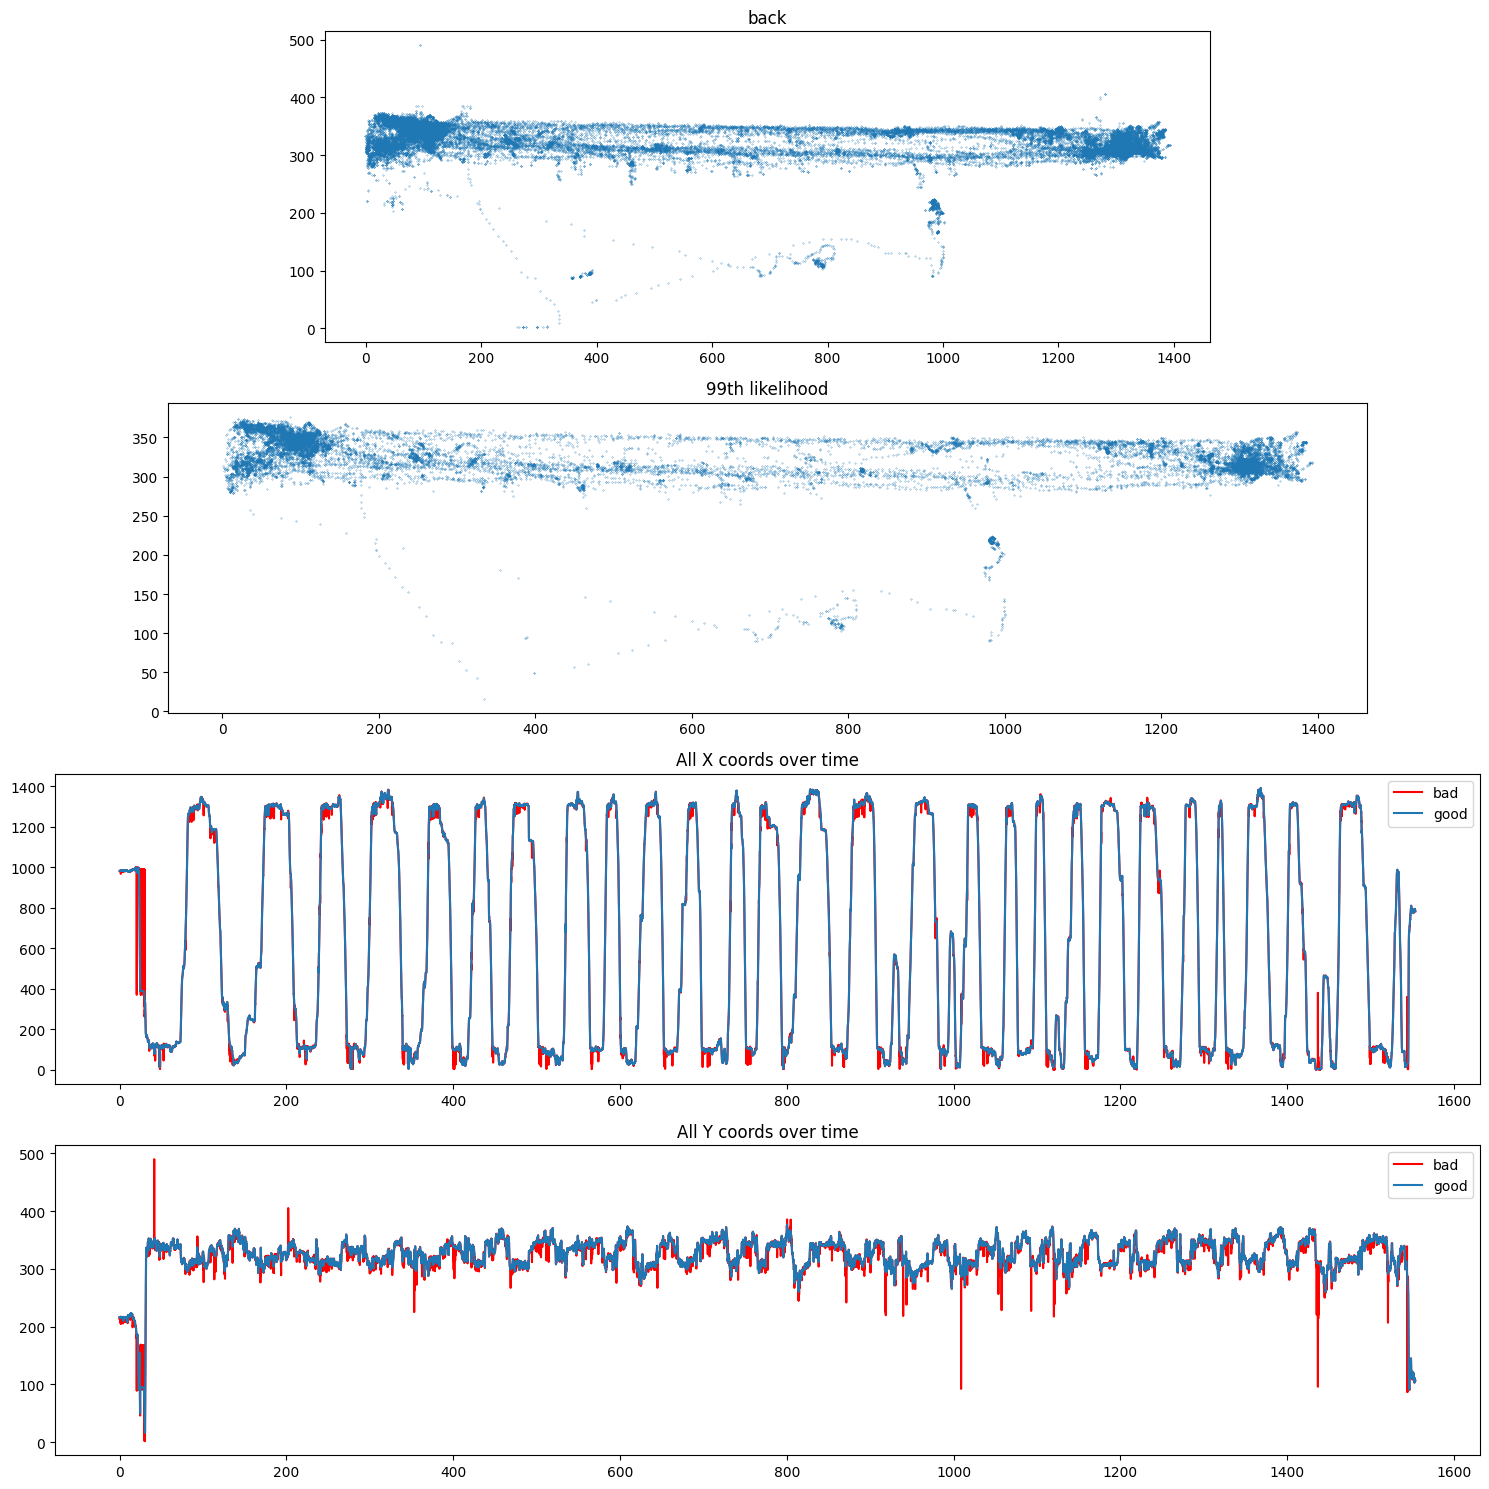

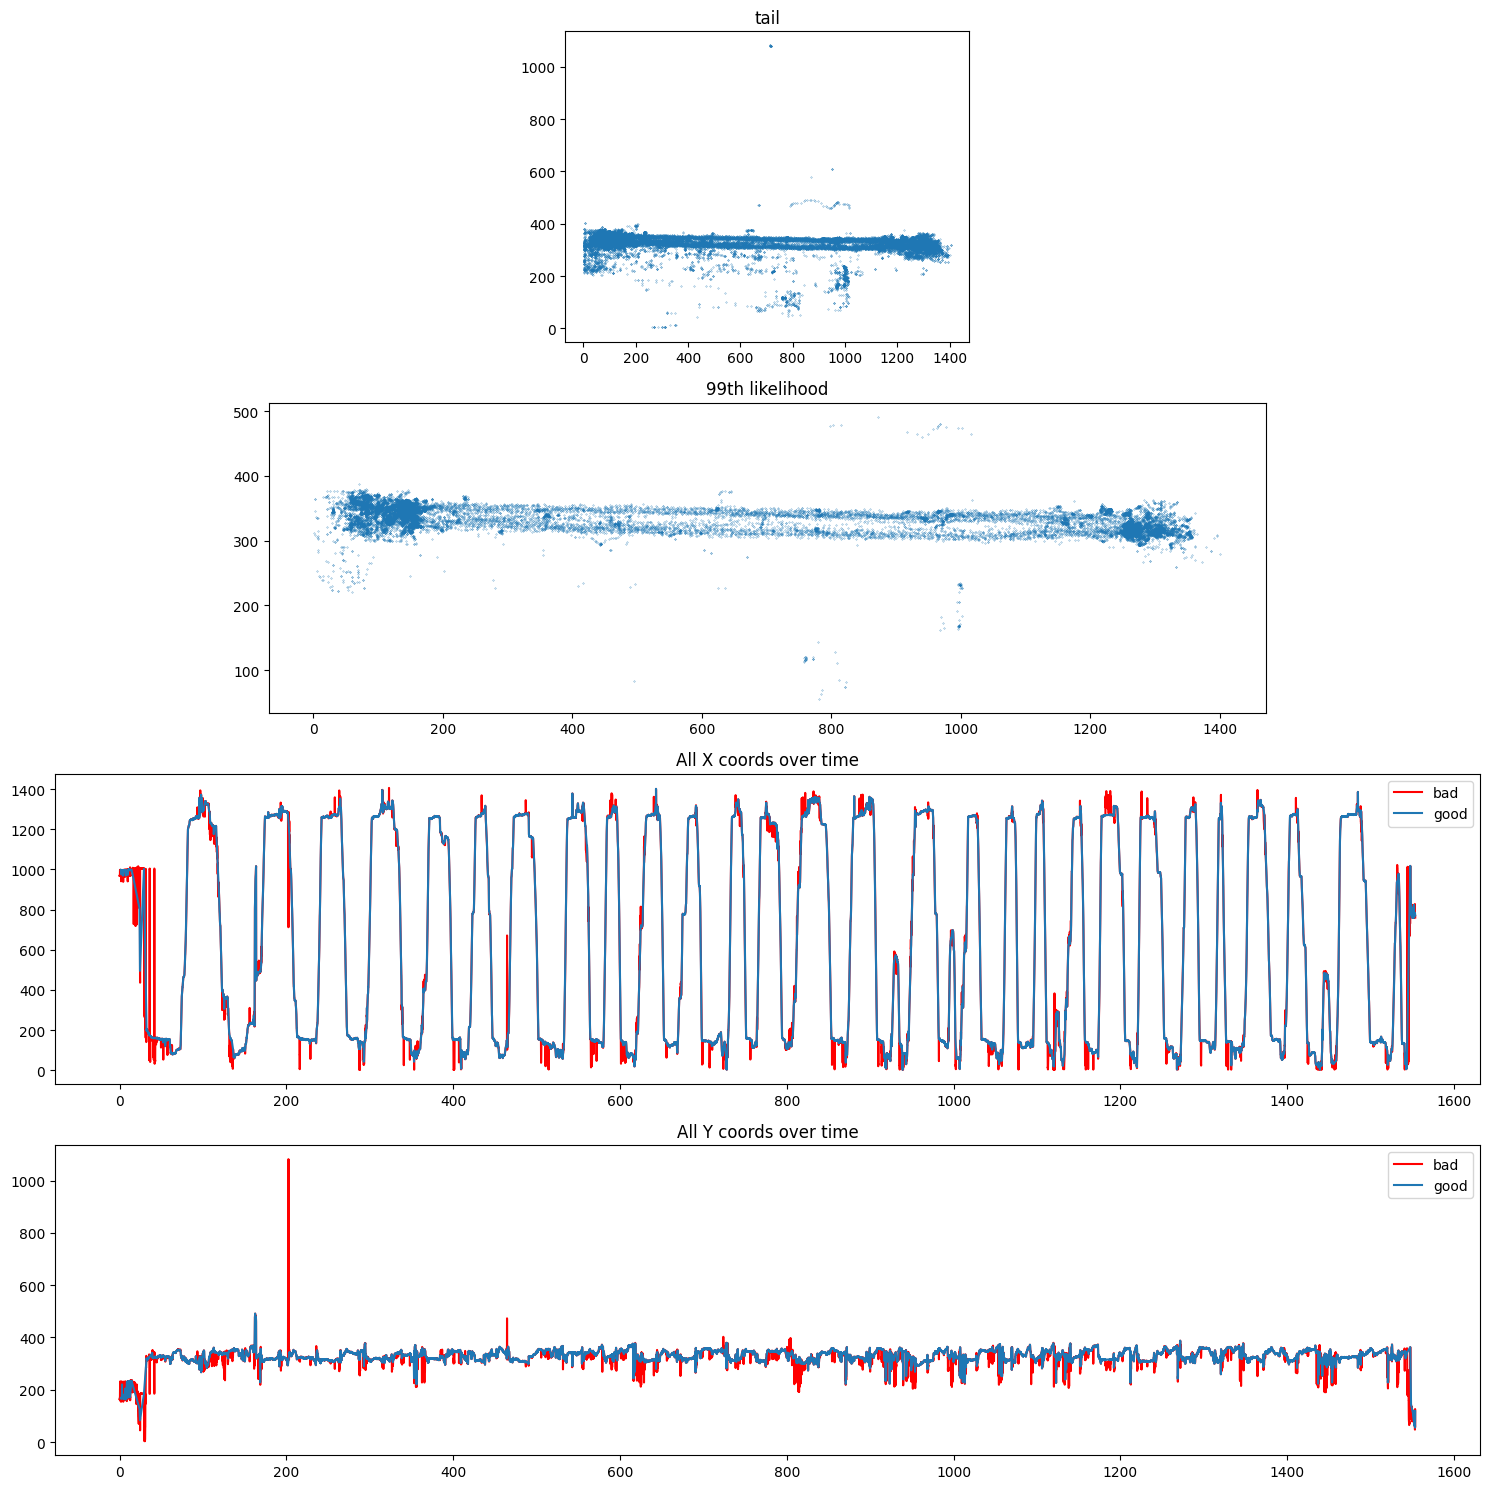

In [12]:
file_name = r'Y:\laura_berkowitz\app_ps1_ephys\data\hpc17\hpc17_day08_240826_093245\hpc17_LT_day08-08262024154709DLC_resnet50_ephys1_linearAug19shuffle1_200000_filtered.csv'


# file_name = r'Y:\laura_berkowitz\alz_stim\data\beta\beta_day03\beta_day03_230628_175918\beta_OL_test_day03_20230628_175938541DLC_resnet50_mouse_close_camera_multi_mazeJan3shuffle1_260000_filtered.csv'

summary = plot_all_checks(file_name)
summary